In [10]:
import os
import time

start = time.time()
if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [11]:
import json
import random
import itertools
%load_ext memory_profiler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.models as gm
from tqdm import tqdm
from gensim.models import KeyedVectors
import seaborn as sns

from badseeds import replicate_fig2
from badseeds import utils, seedbank, metrics


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [12]:
# path to config json file containing paths to datasets. change if necessary
CONFIG_PATH = "./config.json"

In [13]:
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

In [14]:
# for replicability
np.random.seed(42)
random.seed(42)

## Models and Data

### Models

In [15]:
%%memit
datasets = []

filenames = [
    "goodreads_r_subpath",
    "goodreads_hb_subpath",
]

for f in filenames:
    models = []
    direct = os.fsencode(
        os.path.join(config["models"]["dir_path"], config["models"][f]["0"])
    )

    for filename in os.listdir(direct):
        f = os.path.join(direct, filename)

        # checking if it is a file
        if os.path.isfile(f):
            f = os.fsdecode(f)
            if ".npy" not in f:
                models.append(KeyedVectors.load(f))

    datasets.append(models)

peak memory: 1509.85 MiB, increment: 0.89 MiB


## Seeds

In [16]:
%%memit
seeds = seedbank.seedbanking(config["seeds"]["dir_path"] + "seeds.json", index = True)


# seed_sets = [
#     "black-Manzini_et_al_2019",
#     "black_roles-Manzini_et_al_2019",
#     "black-Kozlowski_et_al_2019",
#     "black-Rudinger_et_al_2017",
#     # "female_definition_words_2-Zhao_et_al_2018",
#     # "female_stereotype_words-Zhao_et_al_2018",
# ]

seed_sets = [
    "female-Kozlowski_et_al_2019",
    "female_1-Caliskan_et_al_2017",
    "definitional_female-Bolukbasi_et_al_2016",
    "female_singular-Hoyle_et_al_2019",
    "female_definition_words_2-Zhao_et_al_2018",
    "female_stereotype_words-Zhao_et_al_2018",
]

extracted_seeds = [seeds.loc[seed_set]['Seeds'] for seed_set in seed_sets]

peak memory: 1510.48 MiB, increment: 0.46 MiB


## Function call 

In [17]:
%%memit
similarity = replicate_fig2.figure_2(extracted_seeds, datasets)

peak memory: 1510.55 MiB, increment: 0.07 MiB


In [18]:
%%memit
for sim in similarity:
        for i, j in zip(extracted_seeds, sim):
            print(i, "\n")
            print(j, "\n \n")

['woman', 'women', 'she', 'her', 'her', 'hers', 'girl', 'girls', 'female', 'feminine'] 

[-0.19101251 -0.16811562 -0.38281677 -0.38537144 -0.38537144 -0.19637266
 -0.07181384 -0.03656899 -0.21149572 -0.0683847 ] 
 

['sister', 'female', 'woman', 'girl', 'daughter', 'she', 'hers', 'her'] 

[-0.20329372 -0.21149572 -0.19101251 -0.07181384 -0.14172502 -0.38281677
 -0.19637266 -0.38537144] 
 

['woman', 'girl', 'she', 'mother', 'daughter', 'gal', 'female', 'her', 'herself', 'Mary'] 

[-0.19101251 -0.07181384 -0.38281677 -0.33231439 -0.14172502  0.11046532
 -0.21149572 -0.38537144 -0.29162606] 
 

['woman', 'girl', 'mother', 'daughter', 'sister', 'wife', 'aunt', 'niece', 'empress', 'queen', 'princess', 'duchess', 'lady', 'dame', 'waitress', 'actress', 'goddess', 'policewoman', 'postwoman', 'heroine', 'witch', 'stewardess', 'she'] 

[-0.19101251 -0.07181384 -0.33231439 -0.14172502 -0.20329372 -0.14672175
 -0.19757875 -0.02550667  0.28624678 -0.14977498 -0.0266901   0.09609589
 -0.10380705  0

## Visualization

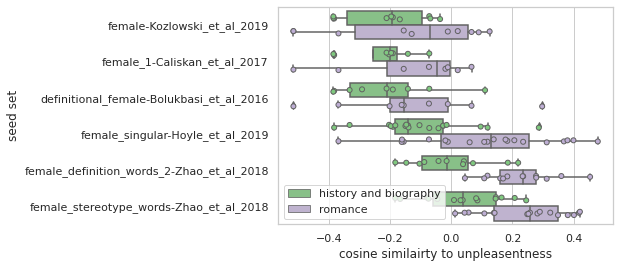

In [19]:
 df1 = pd.DataFrame(
    zip(similarity[0], seed_sets, ["history and biography"] * len(seeds)),
    columns=["cosine similarity", "seed set", "dataset"],
)
df2 = pd.DataFrame(
    zip(similarity[1], seed_sets, ["romance"] * len(seeds)),
    columns=["cosine similarity", "seed set", "dataset"],
)

df = pd.concat([df1, df2])
df = df.explode("cosine similarity")
df["cosine similarity"] = df["cosine similarity"].astype("float")

# Creating plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax1 = sns.boxplot(
    x="cosine similarity", y="seed set", hue="dataset", data=df, palette="Accent"
)
ax2 = sns.stripplot(
    x="cosine similarity",
    y="seed set",
    hue="dataset",
    data=df,
    jitter=True,
    palette="Accent",
    dodge=True,
    linewidth=1,
    edgecolor="gray",
)

legend = ax1.get_legend()
handles = legend.legendHandles
ax.legend(handles, ["history and biography", "romance"])
plt.xlabel('cosine similairty to unpleasentness')
# ax.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])

# show plot
plt.show()


In [20]:
print("Time taken is: ", time.time() - start)

Time taken is:  4.399393558502197
